Working example of the FvCB model of photosynthesis

0. Import important modules

In [1]:
import matplotlib.pyplot as plt
#import Farquhar refers to the farquhar.py file
import Farquhar
import numpy as np

__1. Initialiaze the Model__

    A. Optional inputs of the function: Kc_25, Ko_25, extTp, sim_return
    
    B. While all of them can be changed, I suggest to only ever change 'extTp' and 'sim_return'
    
    C. Default values for extTP = None, the model calculates it based on Vcmax, this can overwrite its value
    
    D. Default for sim_return = 1 to return A. If sim_return = 2, then return A, Ac, Aj, Ap, Rd. Anything else returns A, Kc, Ko, Gx, Vcmax, Jmax, Rd 


In [16]:
FvCB = Farquhar.FvCB(extTp = 7.1, sim_return = 2)

2. Run default model

In [10]:
FvCB.calcphot()

(12.840351697363614,
 13.740351697363614,
 15.579194042275683,
 21.299999999999997,
 0.9)

3. Run the model in a loop with "np.arange(0,1010)" for CO2 values, to produce a CO2 responce curve

In [11]:
CO2 = np.arange(0, 1010, 10)
Ac = np.zeros(len(CO2))
Aj = np.zeros(len(CO2))
Ap = np.zeros(len(CO2))
A = np.zeros(len(CO2))

for i in range(len(CO2)):
    A[i], Ac[i], Aj[i], Ap[i] = FvCB.calcphot(CO2= CO2[i])[0:4]

4. Plot CO2 responce curve

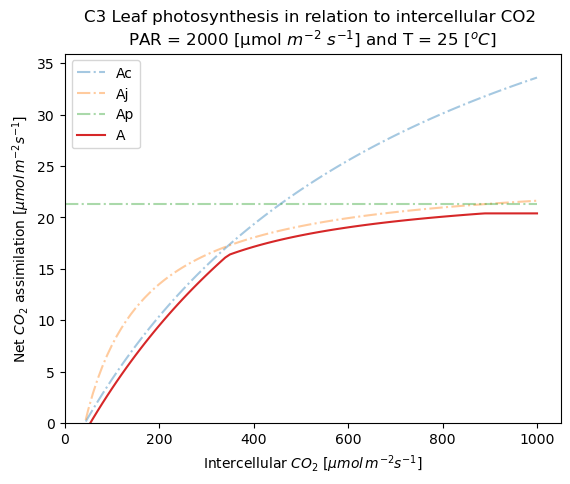

In [12]:
plt.plot(CO2, Ac, '-.', alpha=0.4, label="Ac")
plt.plot(CO2, Aj, '-.', alpha=0.4, label="Aj")
plt.plot(CO2, Ap, '-.', alpha=0.4, label="Ap")
plt.plot(CO2, A, label="A")
plt.title('C3 Leaf photosynthesis in relation to intercellular CO2 \nPAR = 2000 [μmol $m^{-2}$ $s^{-1}$] and T = 25 [$^{o}C$]')
plt.ylabel( r'Net $CO_2$ assimilation $[μmol\, m^{-2} s^{-1}$]')
plt.xlabel(r'Intercellular $CO_2$ $[μmol\, m^{-2} s^{-1}$]')
plt.ylim(ymin = 0)
plt.xlim(xmin = 0)
plt.legend()

The same logic applies to Light responce curve:
    
    5. Run the model in a loop with "np.arange(0,2010)" for PAR values, to produce a Light responce curve

In [13]:
lights = np.arange(0, 2010, 50)
Ac = np.zeros(len(lights))
Aj = np.zeros(len(lights))
Ap = np.zeros(len(lights))
A = np.zeros(len(lights))

for i in range(len(lights)):
    A[i], Ac[i], Aj[i], Ap[i] = FvCB.calcphot(PAR= lights[i])[0:4]

6. Plot Light responce curve

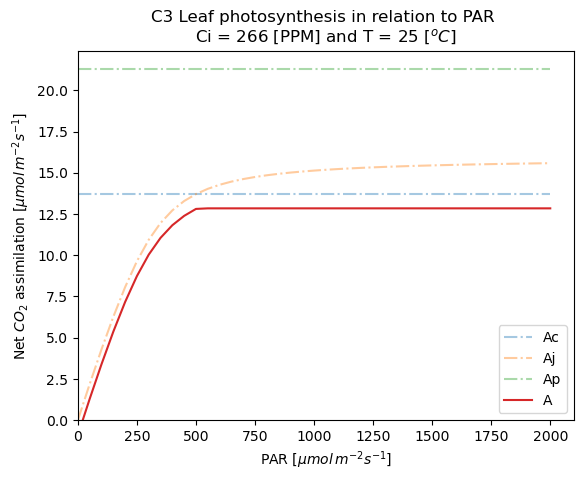

In [14]:
plt.plot(lights, Ac, '-.', alpha=0.4, label="Ac")
plt.plot(lights, Aj, '-.', alpha=0.4, label="Aj")
plt.plot(lights, Ap, '-.', alpha=0.4, label="Ap")
plt.plot(lights, A, label="A")
plt.title('C3 Leaf photosynthesis in relation to PAR \nCi = 266 [PPM] and T = 25 [$^{o}C$]')
plt.ylabel( r'Net $CO_2$ assimilation $[μmol\, m^{-2} s^{-1}$]')
plt.xlabel(r'PAR $[μmol\, m^{-2} s^{-1}$]')
plt.ylim(ymin = 0)
plt.xlim(xmin = 0)
plt.legend()

In [18]:
FvCB = Farquhar.FvCB(extTp = 7.1, sim_return = 3)

In [19]:
FvCB.calcphot()

(12.840351697363614, 404.9, 278.4, 42.75, 60.0, 100.2, 0.9)

In [21]:
temp = np.arange(0, 52, 2)
Kc = np.zeros(len(temp))
Ko = np.zeros(len(temp))
Gx = np.zeros(len(temp))
Vcmax = np.zeros(len(temp))
Jmax = np.zeros(len(temp))
Rd = np.zeros(len(temp))
A = np.zeros(len(temp))

for i in range(len(temp)):
    A[i], Kc[i], Ko[i], Gx[i], Vcmax[i], Jmax[i], Rd[i] = FvCB.calcphot(CO2 = 400, PAR = 800, temper = temp[i], Vcmax_25 = 100, Jmax_25 = 150, Gx_25 = 42.75, theta = 0.9, Rd_25 = 1)

Plot the temperature responce curve of all the "Important" parameters

[Text(0.5, 0, 'Temperature [oC]')]

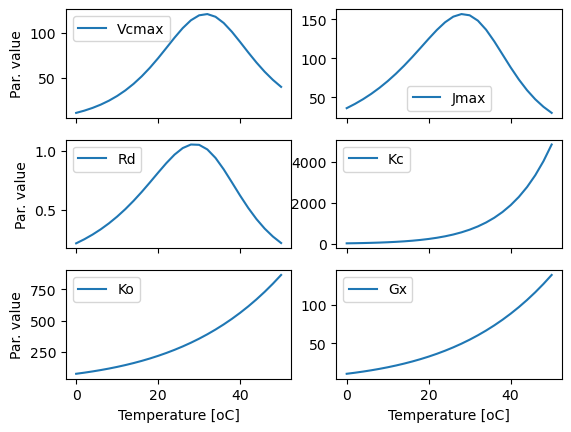

In [22]:
fig, axs = plt.subplots(3, 2, sharex=True)
axs[0, 0].plot(temp, Vcmax, label="Vcmax")
axs[0, 0].legend()
axs[0, 0].set(ylabel = 'Par. value')
axs[0, 1].plot(temp, Jmax, label="Jmax")
axs[0, 1].legend()
axs[1, 0].plot(temp, Rd, label="Rd")
axs[1, 0].legend()
axs[1, 0].set(ylabel = 'Par. value')
axs[1, 1].plot(temp, Kc, label="Kc")
axs[1, 1].legend()
axs[2, 0].plot(temp, Ko, label="Ko")
axs[2, 0].legend()
axs[2, 0].set(xlabel = 'Temperature [oC]', ylabel = 'Par. value')
axs[2, 1].plot(temp, Gx, label="Gx")
axs[2, 1].legend()
axs[2, 1].set(xlabel = 'Temperature [oC]')

Plot the temperature responce curve

Text(0, 0.5, 'A [umols m-2 s-1]')

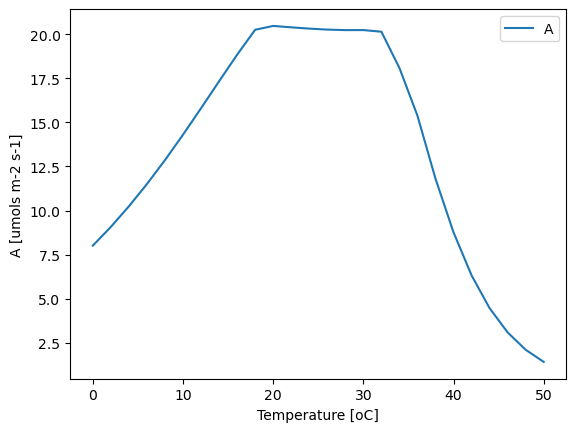

In [23]:
plt.plot(temp, A, label="A")
plt.legend()
plt.xlabel('Temperature [oC]')
plt.ylabel('A [umols m-2 s-1]')

..